In [155]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [152]:
def multi_arm_bandit(n, k, input_mean, input_stddev):
    
    # Each arm has its own distribution
    
    # stores expection of each arm and the number of times that arm is pulled
    expectations = np.zeros([n,2], dtype = np.float32)
    
    # epsilon
    e = 0.1
    
    # performing actions k number of times
    for i in range(k):
        # gives output of range [minval, maxval)
        index =  np.random.randint(low=0, high=n)
        val = np.random.uniform(low=0.0, high=1.0)
        
        # sampling reward from unknown distribution
        reward = np.random.normal( loc=input_mean, scale=input_stddev )
        
#         expectations = tf.cond(val>e, explore(reward, expectations, index), exploit(reward, expectations))
        if(val<e):
            explore(reward, expectations, index)
        else:
            exploit(reward, expectations)
    
    return expectations

def exploit(reward, expectations):
    expectations[np.argmax(expectations[:,0])][1] += 1
    expectations[np.argmax(expectations[:,0])][0] = (expectations[np.argmax(expectations[:,0])][0] + reward)/expectations[np.argmax(expectations[:,0])][1]
    
    return expectations
    
def explore(reward, expectations, index):
    expectations[index][1] += 1
    expectations[index][0] = (expectations[index][0] + reward)/expectations[index][1]
    
    return expectations
    

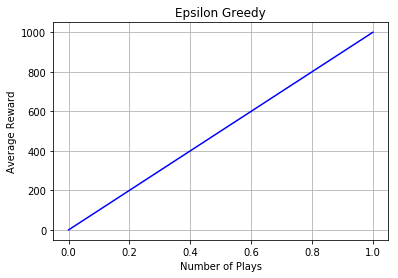

[[6.9856532e-03 9.6600000e+02]
 [2.3778074e-03 9.9100000e+02]
 [1.8874492e-03 9.9800000e+02]
 [4.0837401e-03 1.0020000e+03]
 [3.3640666e-03 1.0430000e+03]]


In [162]:
if __name__=="__main__":
    
    exp = multi_arm_bandit(5, 5000, 5, 1)
    plot_result(exp,'Epsilon Greedy','b')
    print(exp)
        

In [159]:


def plot_result(observation,title,color):
    plt.plot(range(0,len(observation[0])),np.mean(observation,axis=0),color)
    plt.xlabel('Number of Plays')
    plt.ylabel('Average Reward')
    plt.title(title)
    plt.grid()
    plt.show()


In [132]:
mat = np.asarray([[0, 1, 2],
                  [10, 0, 3],
                  [2, 5, 4]])

expectations = np.zeros([3,2], dtype = np.float32)

index = np.argmax(mat[:,0] )
print(mat[:,0])

expectations[index][0] = (expectations[index][0] + 5.0)/expectations[index][1]

expectations

[ 0 10  2]


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


array([[ 0.,  0.],
       [inf,  0.],
       [ 0.,  0.]], dtype=float32)

In [124]:
expectations = np.zeros([3,2], dtype = np.float32)
expectations

array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)